This is my attempt to implement an extremely simple Linear model in PyTorch. It is being done as part of my efforts to get really familiar with PyTorch; my go to exercise when learning a new framework has become implementing the simplest Linear model possible; if I can't do that easily, then I don't understand the philosophy of the framework.

In [33]:
from torch.autograd import Variable
import torch
import torch.utils.data
import torch.nn as nn
import numpy as np
import torch.optim as optim

Here, we're defining a Linear function that takes in a vector, x, some coefficients and returns the output of applying the linear function created by the coefficients.

In [34]:
def lin(x,a,b):
    return a*x + b 

Just specifying some constants. 

Notice that in the last line of this block, I am adding some random Gaussian noise to the output of the linear function so as to make it somewhat less contrived.

In [35]:
num_samples = 100
X = torch.linspace(-5,5,num_samples)
coefficient = 2
intercept = 3
Y = lin(X, coefficient, intercept) + torch.randn(num_samples) 

In [36]:
%matplotlib inline

In [37]:
import matplotlib.pyplot as plt

Here, I'd just like to get a look at what my points are.

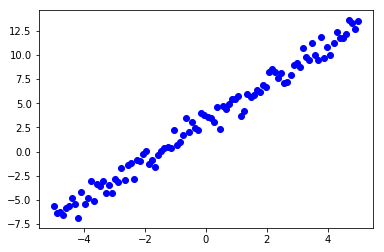

In [38]:
plt.plot(X.numpy(),Y.numpy(), 'bo')

Now, we have to create the linear model in PyTorch and use SGD or some other optimizer to learn the correct values of the coefficients from the data.

Since PyTorch is more OO, I'm creating a Net class that will model the linear function I'm trying to approximate. We'll define a Linear layer with 1 input and 1 output.

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(1,1)
        
    def forward(self, x):
        x = self.fc(x)
        return x
    

net = Net()
print(net)

Net (
  (fc): Linear (1 -> 1)
)


Just to make sure I've understood correctly, I'm going to check the number of parameters. It should be 2, since we're going to have one weight and one bias term.

In [40]:
params = list(net.parameters())
print(len(params))

2


In [51]:
# set up train loader
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X,Y))
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.000001, momentum=0.9)

In [52]:

for i in range(10):
    for i, data in enumerate(trainloader):
        inputs, output = data
        inputs, output = Variable(inputs.float()), Variable(output.float())
        optimizer.zero_grad()
        out = net(inputs)
        loss = criterion(out, output)
        loss.backward()
        optimizer.step()
        print("Loss = ", loss.data[0])
    

Loss =  1.9155834913253784
Loss =  0.18033386766910553
Loss =  0.13561712205410004
Loss =  0.020324306562542915
Loss =  0.10115119069814682
Loss =  0.11159875988960266
Loss =  0.9941929578781128
Loss =  0.02034565806388855
Loss =  2.231555700302124
Loss =  1.0092710256576538
Loss =  0.1917548030614853
Loss =  5.8528243243927136e-05
Loss =  2.3371434211730957
Loss =  0.5262189507484436
Loss =  0.6317999362945557
Loss =  0.15297836065292358
Loss =  0.5183643102645874
Loss =  0.5499575138092041
Loss =  0.0036953447852283716
Loss =  1.1752314567565918
Loss =  0.021764280274510384
Loss =  0.17398013174533844
Loss =  0.7751170992851257
Loss =  0.33544450998306274
Loss =  0.5642043352127075
Loss =  0.6045317053794861
Loss =  1.1418273448944092
Loss =  0.5088368654251099
Loss =  0.13984791934490204
Loss =  0.7564740180969238
Loss =  1.1058567762374878
Loss =  0.3256721496582031
Loss =  0.09398768097162247
Loss =  1.4998321533203125
Loss =  0.022479219362139702
Loss =  0.0012268534628674388
Los

Loss =  0.02171773463487625
Loss =  0.005599537398666143
Loss =  1.7923330068588257
Loss =  0.7713517546653748
Loss =  9.766817129275296e-06
Loss =  0.4694516360759735
Loss =  1.9052834510803223
Loss =  0.17730805277824402
Loss =  0.13309119641780853
Loss =  0.02128354273736477
Loss =  0.09911511838436127
Loss =  0.10952365398406982
Loss =  0.9881525039672852
Loss =  0.019511675462126732
Loss =  2.2401773929595947
Loss =  1.0036176443099976
Loss =  0.19417744874954224
Loss =  2.4474644305882975e-05
Loss =  2.329038381576538
Loss =  0.5300078392028809
Loss =  0.627728283405304
Loss =  0.15100856125354767
Loss =  0.5147839784622192
Loss =  0.5536082983016968
Loss =  0.003996138460934162
Loss =  1.180432915687561
Loss =  0.021071067079901695
Loss =  0.17593973875045776
Loss =  0.7710414528846741
Loss =  0.33810681104660034
Loss =  0.560797929763794
Loss =  0.6010391116142273
Loss =  1.1465944051742554
Loss =  0.5056923627853394
Loss =  0.13821609318256378
Loss =  0.7527059316635132
Loss =

Loss =  0.6664078235626221
Loss =  0.00016755287651903927
Loss =  0.10616890341043472
Loss =  0.9724838733673096
Loss =  1.0850343704223633
Loss =  0.22507350146770477
Loss =  0.11460421979427338
Loss =  0.07489485293626785
Loss =  0.10625500231981277
Loss =  2.2163920402526855
Loss =  0.12742064893245697
Loss =  0.014798196032643318
Loss =  1.8096466064453125
Loss =  0.0005008161533623934
Loss =  0.5348783135414124
Loss =  2.055666923522949
Loss =  0.8653565049171448
Loss =  0.00039807514986023307
Loss =  1.072038173675537
Loss =  1.0563293471932411e-05
Loss =  0.8102173209190369
Loss =  0.0030317511409521103
Loss =  0.02206994593143463
Loss =  0.005425077863037586
Loss =  1.7892241477966309
Loss =  0.7693411707878113
Loss =  3.980370820499957e-06
Loss =  0.467922568321228


In [50]:
params = list(net.parameters())
for i in params:
    print(i)

Parameter containing:
 1.9824
[torch.FloatTensor of size 1x1]

Parameter containing:
 2.9345
[torch.FloatTensor of size 1]

